<a href="https://colab.research.google.com/github/pondbaahh/multivariate/blob/main/EXAM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 Pizza

In [29]:
import pandas as pd

In [30]:
data = pd.read_csv('Pizza.csv')
data.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [31]:
import numpy as np #ดึงฟังก์ชั่น numpy ที่ทำงานเกี่ยวกับตัวเลขมา

In [32]:
data.shape   #dataมี 300 ตัว และมี 9 dimensions

(300, 9)


### เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

เลือกมาทำเฉพาะข้อมูลที่เป็นตัวเลข

In [33]:
newdata = data.iloc[:,2:]  #ข้อมูลมีมากจึงเลือกเอาหลักที่เป็นตัวเลข จึงทำการตัดหลักตั้งแต่หลักที่ 1 ถึงหลักที่ 2
newdata.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


ตรวจสอบว่า ระหว่าง coluns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [34]:
import numpy as np    #ดึงฟังก์ชั่น numpy ที่ทำงานเกี่ยวกับตัวเลขมา

In [35]:
corr = np.corrcoef(newdata.to_numpy().T)

In [36]:
corr.shape 

(7, 7)

In [37]:
corr  #ค่าcorrelation มีค่าเป็น 1 ในเส้นแทยงมุม ถ้าช่องอื่นมีค่าเป็น 1 อีกแสดงว่ามีค่าเท่ากัน

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [38]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')  
# คำสั่งนี้เพื่อหาค่า correlationที่เป็น 1 ที่ไม่ใช่เส้นแทยงมุม ซึ่งข้อนี้ไม่มี column ที่ซ้ำกัน
         

### ทดลอง plot กราฟ parallel coordinate

In [39]:
data_dropped = data.drop(['id'], axis=1)
data_dropped

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [40]:
data_dropped2 = data.drop(['brand', 'id'], axis=1)
data_dropped2

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


###ทดลอง plot กราฟ

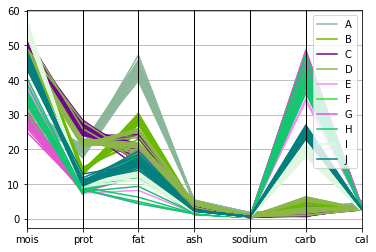

In [41]:
pd.plotting.parallel_coordinates(data_dropped,'brand',cols=['mois',	'prot',	'fat',	'ash',	'sodium',	'carb',	'cal'])

### ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)

In [79]:
new_pca = pca.fit_transform(data_dropped2.to_numpy())

In [80]:
new_pca.shape

(300, 2)

In [81]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

### ดูว่ามี Brand อะไรบ้าง

In [82]:
FG = set(data['brand'])
FG

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

#### สร้าง color list แบบข้างล่างนี้ ​ลำดับจะไม่มีการเปลี่ยนแปลง

In [83]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [84]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

### แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [85]:
data_dropped = data_dropped.replace(color_list2)


TypeError: ignored

In [ ]:
data_dropped

Plot กราฟ Scatter

In [73]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'])

NameError: ignored

In [57]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'],alpha=0.5)

NameError: ignored

### ทดลอง เปรียบเทียบค่าสารอาหาร fat และ sodium

In [ ]:
bb = data_dropped[(data_dropped['brand']==1) | (data_dropped['brand']==4)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

In [ ]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

In [ ]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['brand'],alpha=0.5)

In [ ]:
fat_pca = pca.transform(bb[bb['brand']==1].iloc[:,1:].to_numpy())
sodium_pca = pca.transform(bb[bb['brand']==4].iloc[:,1:].to_numpy())

In [ ]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'^r',alpha=0.5,label='fat')
plt.plot(sodium_pca[:,0],sodium_pca[:,1],'*y',alpha=0.5,label='sodium')
plt.legend()

### 2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'^r',alpha=0.5,label='fat')
plt.plot(sodium_pca[:,0],sodium_pca[:,1],'*y',alpha=0.5,label='sodium')
plt.legend()
plt.title('comparison of nutritions between fat VS sodium with PCA')
plt.xlabel('PC1 (97.40%)')
plt.ylabel('PC2 (2.52%)');

### Eigen Vectors

3.11513052e-04 = $3.11 x 10^{-4}$

In [ ]:
pca.components_

In [ ]:
import numpy as np

In [ ]:
np.argmax(pca.components_[0,:])

## 2 nndb_flat

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('nndb_flat.csv')  #อัปโหลดไฟล์มาใส่ในตัวเเปร data เเล้วทำการปริ้นท์ออกมา
data.head(10)

### ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [ ]:
data.shape   #dataทั้งหมด 8618 ตัว และมีdimensions 45 ตัว

### เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข

In [ ]:
newdata = data.iloc[:,7:] #ทำการตัดคอลัมป์ออกให้เหลือเเค่คอลัมป์ที่เป็นตัวเลข ซึ่งตัดตั้งแต่หลัก 1 ถึง หลัก 7
newdata.head()

### ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [ ]:
import numpy as np

In [ ]:
corr = np.corrcoef(newdata.to_numpy().T)

In [ ]:
corr.shape  # หาค่าcorrelation ที่ condideta

In [ ]:
corr  #ค่าcorrelation มีค่าเป็น 1 ในเส้นแทยงมุม ถ้าช่องอื่นมีค่าเป็น 1 อีกแสดงว่ามีค่าเท่ากัน

In [ ]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} <=> column = {j} corrcoef = {corr[i,j]}')
  # คำสั่งนี้เพื่อหาค่า correlationที่เป็น 1 ที่ไม่ใช่เส้นแทยงมุม
  #ซึ่งมีทั้งหมด 12 แถว

In [ ]:
newdata.iloc[:5,10:30]

In [ ]:
from matplotlib import pyplot as plt

### data ที่มี correlation เป็น 1

In [ ]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'g.') #ค่า correlation เท่ากับ 1 เเต่คนละค่าเวลา plot กราฟจะเป็นเส้นตรง

In [ ]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'g.') #ค่า correlation เท่ากับ 1 ค่าเดียวกันเวลา plot กราฟจะเป็นเส้นตรงเช่นกัน

### data ที่มี correlation เป็นค่าอื่นๆ

In [ ]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'y.')  #ค่า correlation ที่ไม่ได้มาจากที่เดียวกันเวลา plotกราฟจะเกิดการกระจาย

ลบ column ซ้ำ

In [ ]:
newdata.columns.str.contains('_USRDA')

In [ ]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

In [ ]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

### ลบ columns ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น

In [ ]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

In [ ]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

### ทดลอง plot กราฟ parallel coordinate

In [ ]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

### ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [ ]:
new_pca.shape

In [ ]:
new_pca

### ดูว่ามี food group อะไรบ้าง

In [ ]:
FG = set(data['FoodGroup'])
FG

## สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

 สร้าง color list แบบข้างล่างนี้ ​ลำดับจะไม่มีการเปลี่ยนแปลง

In [ ]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [ ]:
color_list2

###แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [ ]:
data_dropped2 = data_dropped.replace(color_list2)

In [ ]:
data_dropped2

Plot กราฟ Scatter

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

### ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ Beverages

In [ ]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==4)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

In [ ]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

In [ ]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['FoodGroup'],alpha=0.5)

In [ ]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'og',alpha=0.5,label='baby')
plt.plot(Beverages_pca[:,0],Beverages_pca[:,1],'*b',alpha=0.5,label='Beverages')
plt.legend()

###2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [ ]:
pca.explained_variance_ratio_

### การใส่ชื่อกราฟ และ แกน

In [ ]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'og',alpha=0.5,label='baby')
plt.plot(Beverages_pca[:,0],Beverages_pca[:,1],'*b',alpha=0.5,label='Beverages')
plt.legend()
plt.title('comparison of nutritions between Beverages VS baby food with PCA')
plt.xlabel('PC1 (73.26%)')
plt.ylabel('PC2 (19.42%)');

### ลองทำ PCA ใหม่ เพราะ PC1 + PC2 ยังอธิบายข้อมูลได้ไม่ถึง 90%

In [ ]:
pca = PCA()
new_pca3 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_[:3])

In [ ]:
pca2 = PCA(n_components=3)
new_pca3 = pca2.fit_transform(bb.iloc[:,1:].to_numpy())

In [ ]:
new_pca3

In [ ]:
baby_pca3 = pca2.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
Beverages_pca3 = pca2.transform(bb[bb['FoodGroup']==4].iloc[:,1:].to_numpy())

In [ ]:
baby_pca3

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter3D(baby_pca3[:,0],baby_pca3[:,1],baby_pca3[:,2],c='b')
ax.scatter3D(Beverages_pca3[:,0],Beverages_pca3[:,1],Beverages_pca3[:,2],c='r')
ax.set_title('Comparison of nutritions between Beverages VS baby food with PCA')
ax.set_xlabel('PC1 (73.26%)')
ax.set_ylabel('PC2 (19.42%)')
ax.set_zlabel('PC3 (4.22%)');